                            OLS Regression Results                            
Dep. Variable:              WinOrLose   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     64.20
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           3.61e-65
Time:                        21:40:10   Log-Likelihood:                -196.32
No. Observations:                 494   AIC:                             408.6
Df Residuals:                     486   BIC:                             442.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3734      0.068     

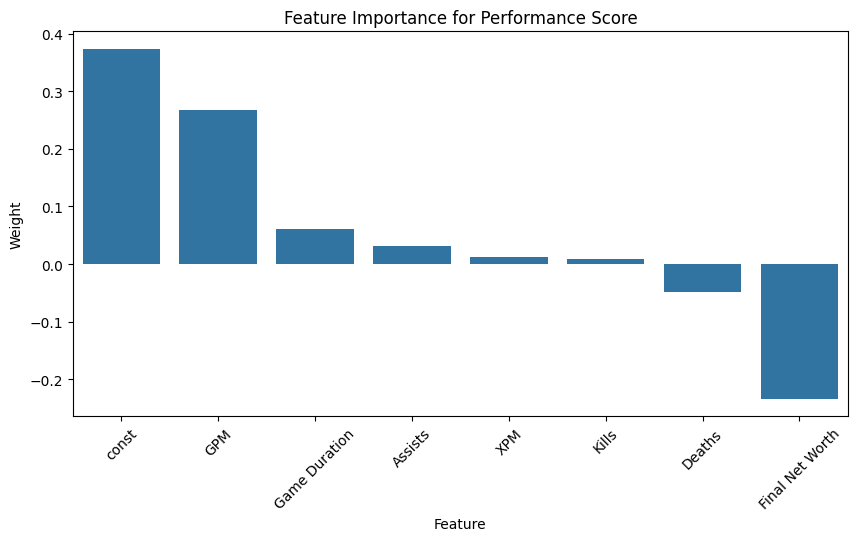

In [6]:
# Performance Weights
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("preprocessed_data.xlsx")

# Define independent variables (Features) and dependent variable (Target)
features = ['Kills', 'Assists', 'Deaths', 'GPM', 'XPM', 'Game Duration', 'Final Net Worth']
X = df[features]
y = df['WinOrLose']

# Add constant term for regression
X = sm.add_constant(X)

# Train linear regression model
model = sm.OLS(y, X).fit()

# Get model summary
print(model.summary())

# Extract learned weights (coefficients)
coefficients = pd.DataFrame({'Feature': X.columns, 'Weight': model.params})
coefficients = coefficients.sort_values(by='Weight', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,5))
sns.barplot(data=coefficients, x='Feature', y='Weight')
plt.title("Feature Importance for Performance Score")
plt.xticks(rotation=45)
plt.show()


In [5]:
import statsmodels.api as sm

# Define independent variables (all contributing to performance)
X = df[['Kills', 'Deaths', 'Assists', 'GPM', 'XPM', 'Game Duration']]
y = df['WinOrLose']  # Target variable

# Add constant for OLS
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Display coefficients (weights)
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              WinOrLose   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     73.08
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           8.63e-65
Time:                        20:49:13   Log-Likelihood:                -199.47
No. Observations:                 494   AIC:                             412.9
Df Residuals:                     487   BIC:                             442.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3708      0.068      5.460

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
import shap

# Load Data
df = pd.read_excel("selected_features.xlsx")

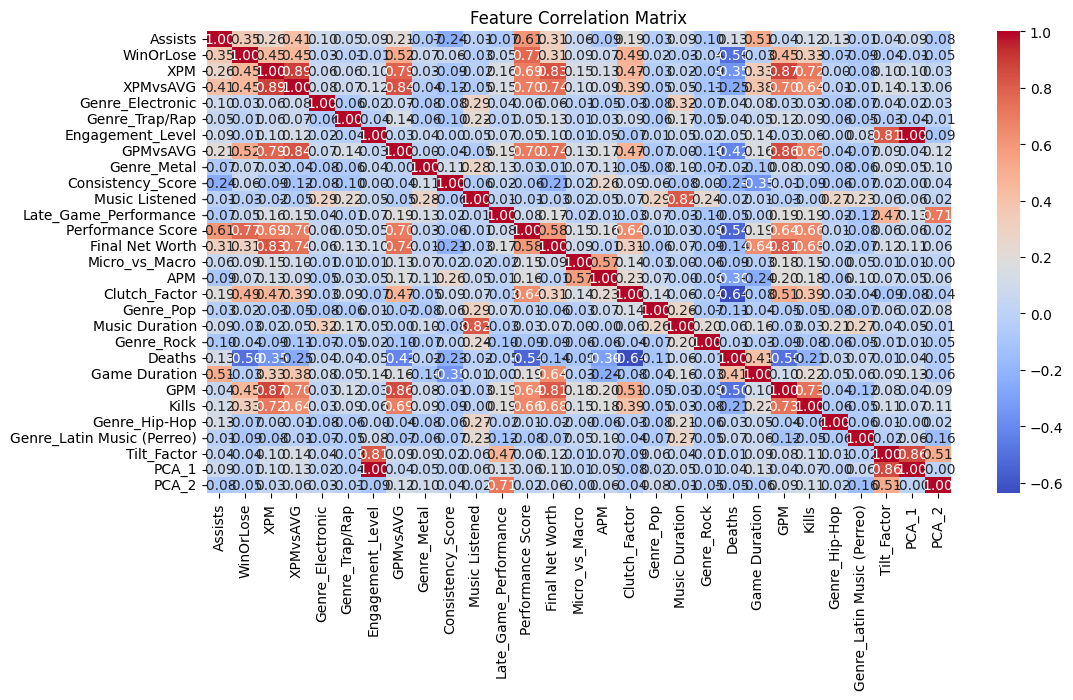

In [7]:
# Feature Engineering Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

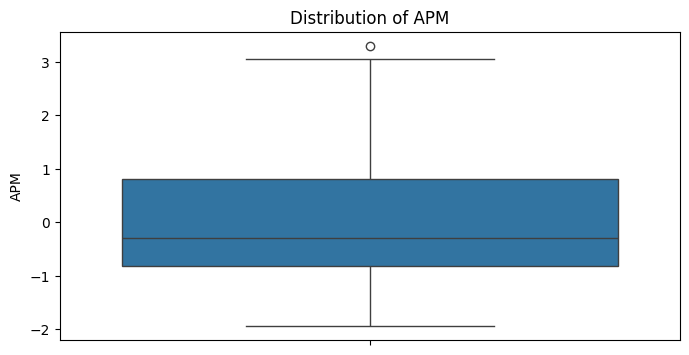

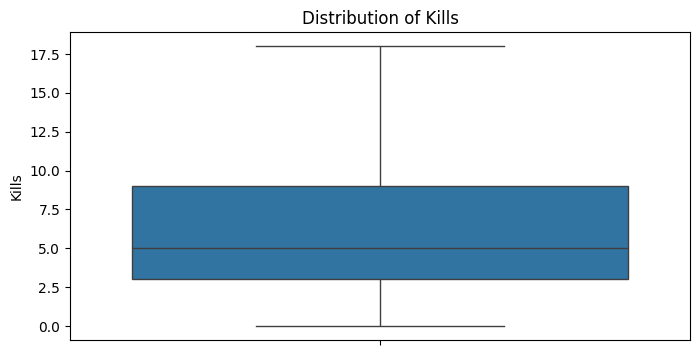

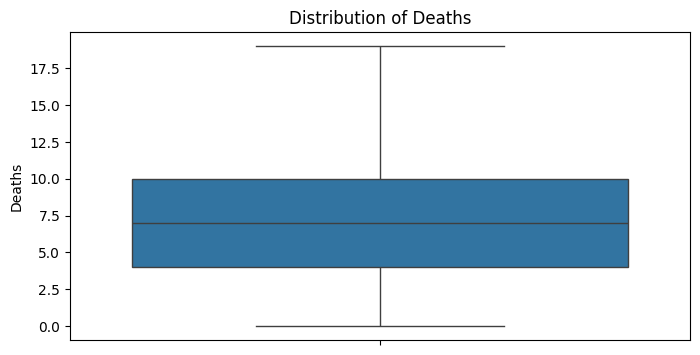

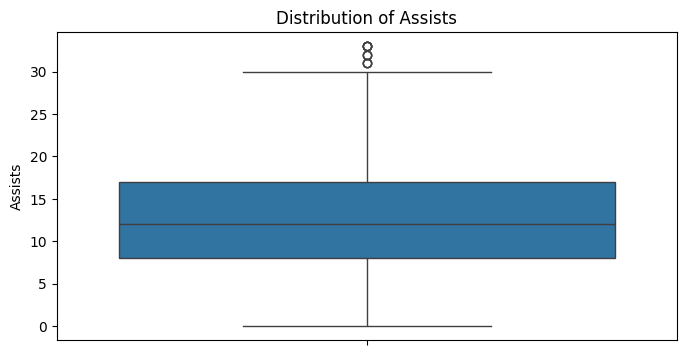

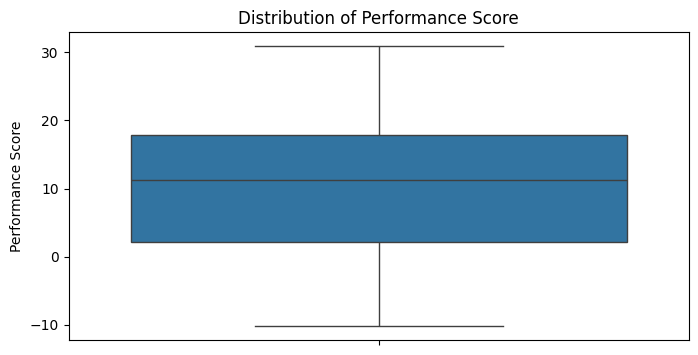

In [8]:
# Boxplots for Key Features
features_to_plot = ['APM', 'Kills', 'Deaths', 'Assists', 'Performance Score']
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[feature])
    plt.title(f"Distribution of {feature}")
    plt.show()


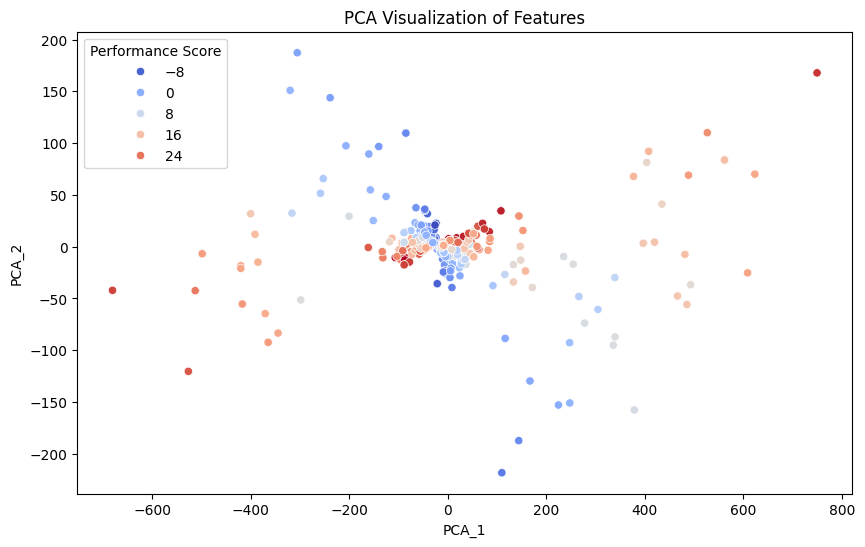

In [3]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop(columns=['Performance Score']))
df['PCA_1'], df['PCA_2'] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA_1'], y=df['PCA_2'], hue=df['Performance Score'], palette='coolwarm')
plt.title("PCA Visualization of Features")
plt.show()

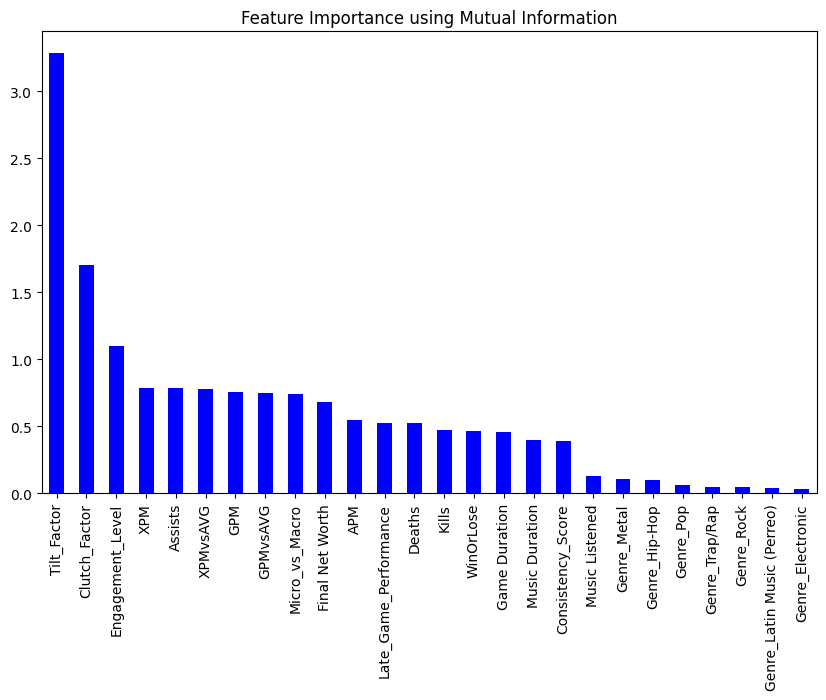

In [2]:
# Feature Importance using Mutual Information
X = df.drop(columns=['Performance Score'])
y = df['Performance Score']
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
mi_scores.plot(kind='bar', color='blue')
plt.title("Feature Importance using Mutual Information")
plt.show()

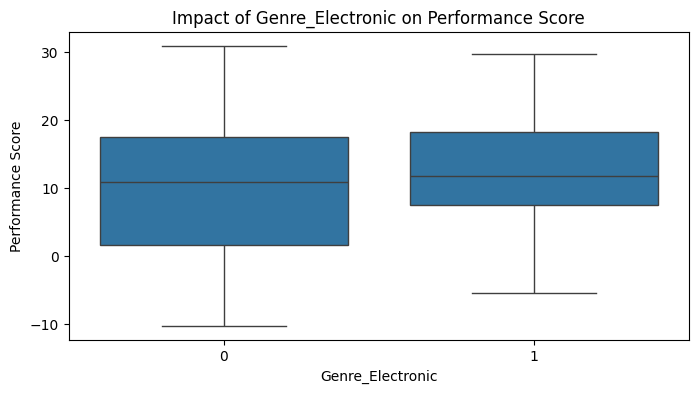

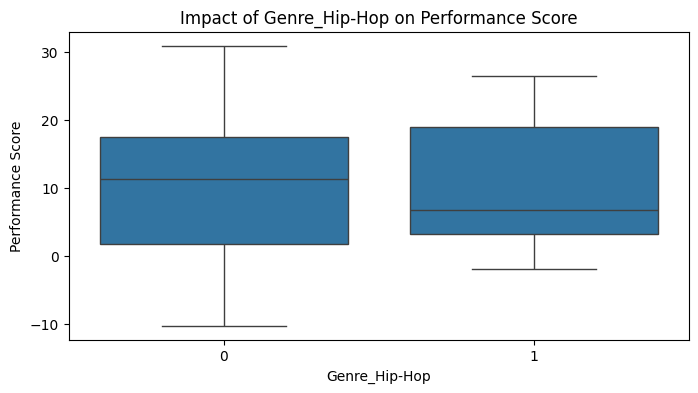

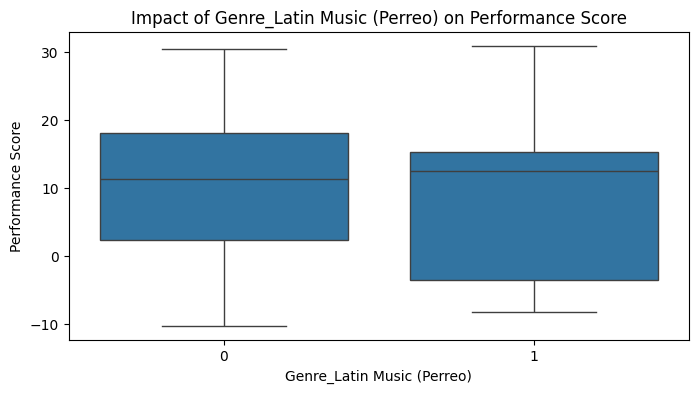

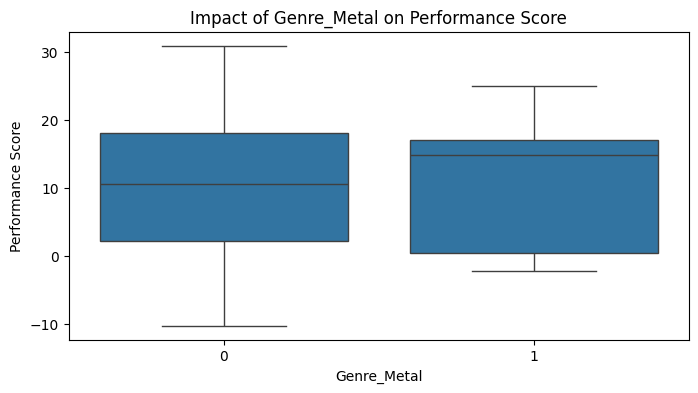

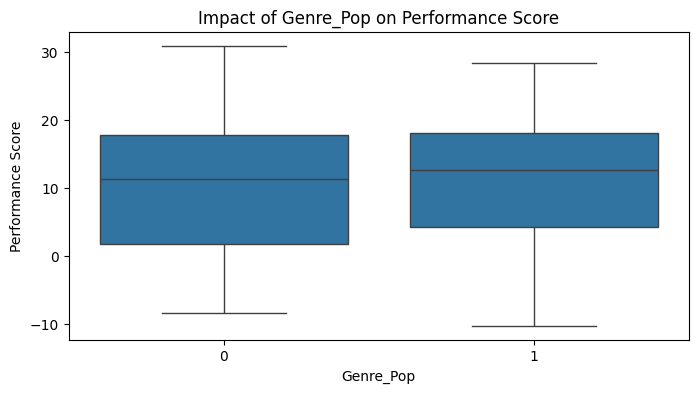

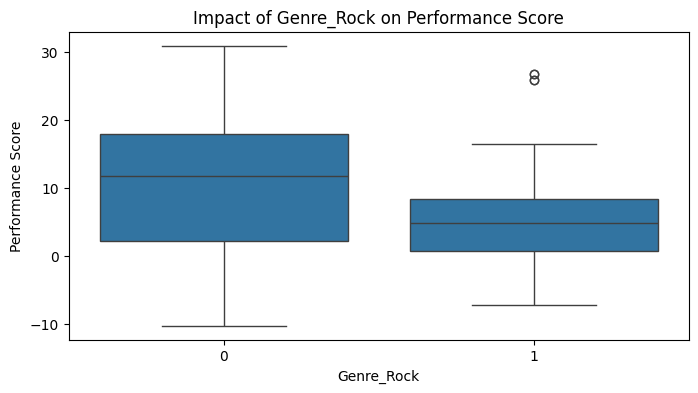

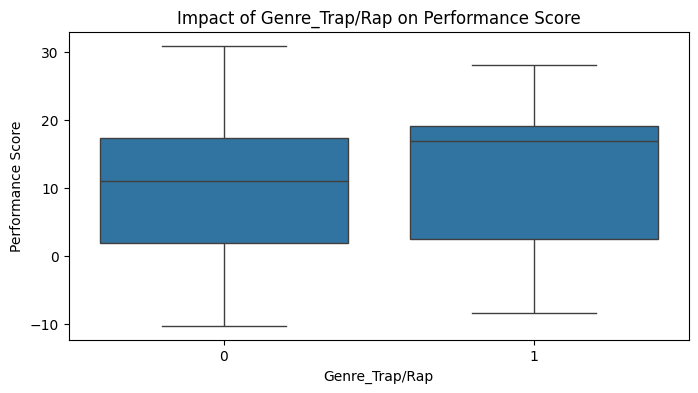

In [9]:
# Music Genre Impact on Performance
music_genres = ['Genre_Electronic', 'Genre_Hip-Hop', 'Genre_Latin Music (Perreo)',
                'Genre_Metal', 'Genre_Pop', 'Genre_Rock', 'Genre_Trap/Rap']

for genre in music_genres:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[genre], y=df['Performance Score'])
    plt.title(f"Impact of {genre} on Performance Score")
    plt.xlabel(genre)
    plt.ylabel("Performance Score")
    plt.show()

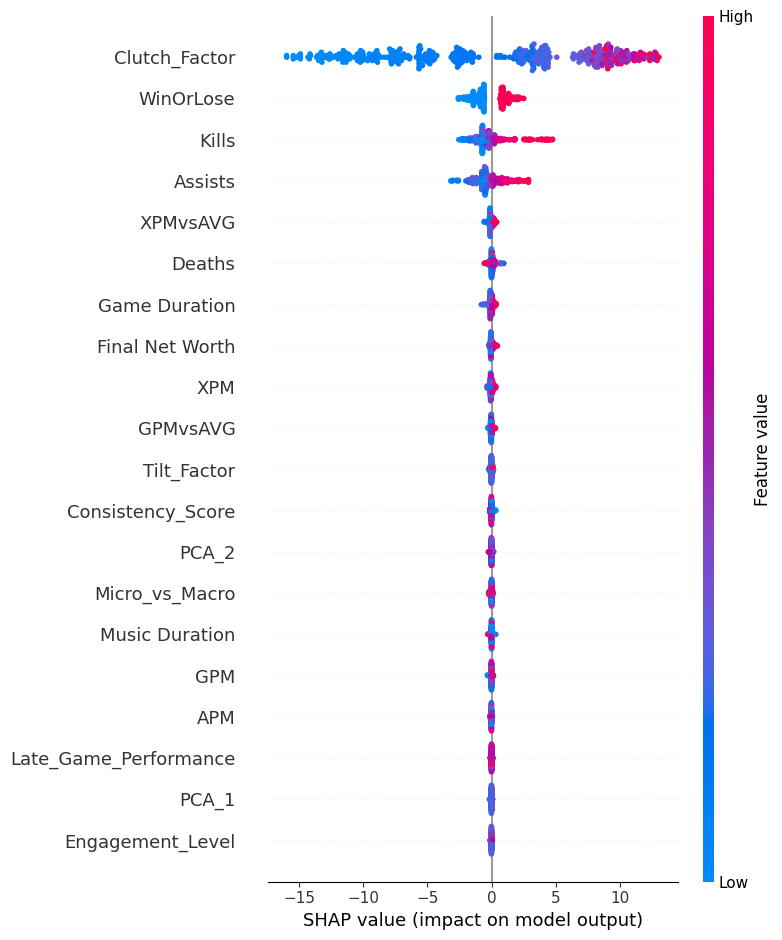

In [6]:
# SHAP Analysis
explainer = shap.Explainer(rf)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

# Save PCA & Feature Selection Data
df.to_excel("feature_analysis_results.xlsx", index=False)

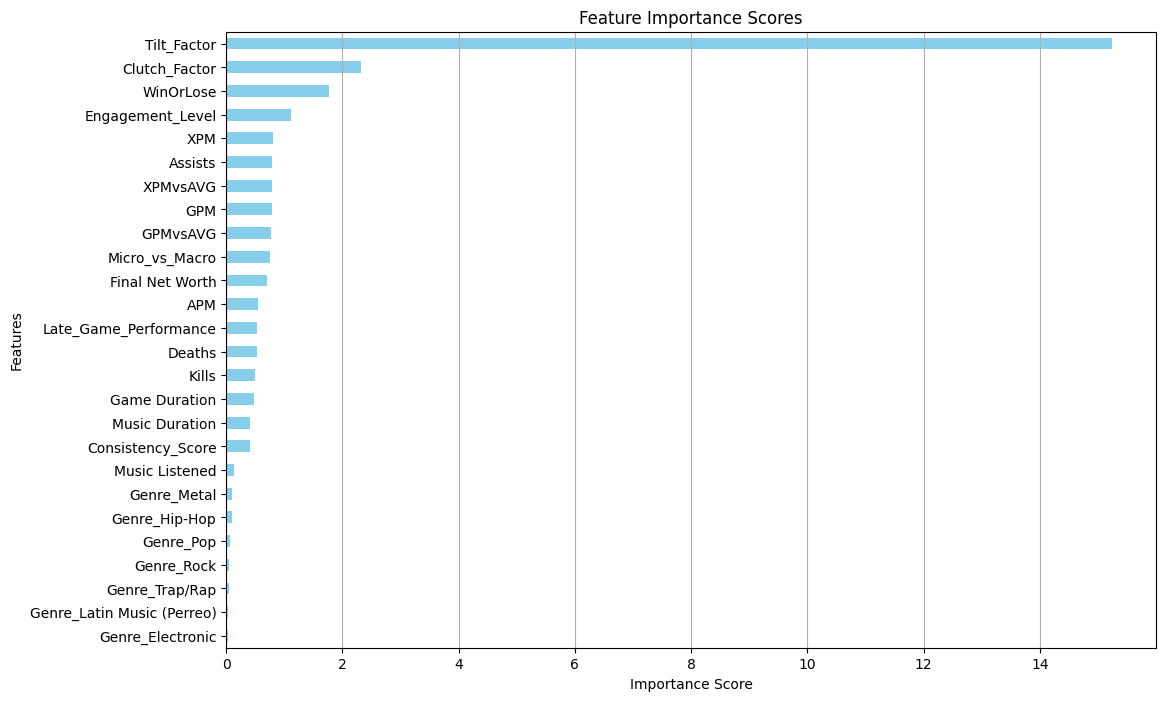

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap

# Load the dataset
file_path = "selected_features.xlsx"
df = pd.read_excel(file_path)

# Define target variable
y = df['Performance Score']
X = df.drop(columns=['Performance Score'])

# Calculate Mutual Information
mi_scores = mutual_info_regression(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Permutation Feature Importance
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)
perm_importance_scores = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)

# SHAP Feature Importance
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap_importance = pd.Series(np.abs(shap_values.values).mean(axis=0), index=X.columns).sort_values(ascending=False)

# Combine scores into a DataFrame
importance_df = pd.DataFrame({
    'Mutual Information': mi_scores,
    'Permutation Importance': perm_importance_scores,
    'SHAP Importance': shap_importance
}).fillna(0)

# Calculate total importance
importance_df['Total Importance'] = importance_df.sum(axis=1)

# Plotting
plt.figure(figsize=(12, 8))
importance_df['Total Importance'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance Scores')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()